#  Proyecto - Red Recurrente

Elaborado por: Yurandir Santa María Santana Sandoval - Carné no. 18001546.

## Objetivo

La tercera parte del proyecto consiste en una red neuronal tipo recurrente, por lo que se ha escogido una base de datos del tipo de cambio del dólar respecto al quetzal, siendo el objetivo del análisis crear un modelo capaz de predecir el tipo de cambio.

## Librerías

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

## Código

In [59]:
BBDD = pd.read_csv('historico_rango2.csv', encoding='utf-8',index_col='Date',parse_dates=True)

In [60]:
BBDD.head()

,Exchange_Rate
Date,
2018-01-01,7.34477
2018-01-01,7.34746
2018-01-01,7.34126
2018-01-01,7.34148
2018-01-01,7.34406


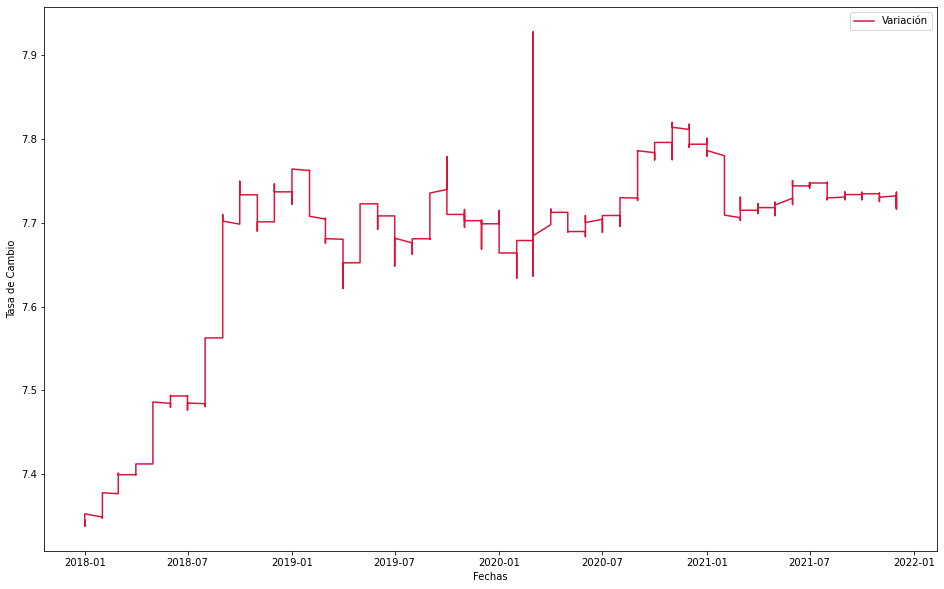

In [61]:
# Gráfica de Variación en el tiempo

plt.figure(figsize=(16,10))

plt.plot(BBDD['Exchange_Rate'], label='Variación', c = 'Crimson')

plt.xlabel('Fechas')
plt.ylabel('Tasa de Cambio')
plt.legend();

In [62]:
# Configuraciónde la Base de Datos

np.random.seed(8)

DataSet = BBDD['Exchange_Rate'].values.astype(np.float32)
DataSet = np.reshape(dataset, (-1, 1))
DataSet[-6:]

array([[0.28264046],
       [0.28264046],
       [0.3103981 ],
       [0.2926731 ],
       [0.29226494],
       [0.29226494]], dtype=float32)

In [63]:
# Normalización

scaler = MinMaxScaler(feature_range=(-1, 1))
DataSet = scaler.fit_transform(DataSet)
DataSet[-6:]

array([[0.28264046],
       [0.28264046],
       [0.3103981 ],
       [0.2926731 ],
       [0.29226494],
       [0.29226494]], dtype=float32)

In [64]:
# Split de Entrenamiento y Test

train_size = int(len(DataSet) * 0.8)
test_size = len(DataSet) - train_size
train, test = DataSet[0:train_size,:], DataSet[train_size:len(dataset),:]

len(train),len(test)

(1168, 293)

In [65]:
# Función de Dataset y Secuencias 

def NewDDBB(DDBB, look_back=1):
    dataX, dataY = [], []
    for i in range(len(DDBB)-look_back):
        a = DDBB[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(DDBB[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [66]:
lookback = 6

trainX, trainY = NewDDBB(train, lookback)
testX, testY = NewDDBB(test, lookback)

In [67]:
trainY = trainY.reshape(-1, 1)
testY = testY.reshape(-1, 1)

trainY.shape, testY.shape

((1162, 1), (287, 1))

In [68]:
# Reshape

trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
testX = testX.reshape((testX.shape[0], testX.shape[1], 1))

In [69]:
trainX.shape, testX.shape

((1162, 6, 1), (287, 6, 1))

In [70]:
model = Sequential()

model.add(LSTM(units=6, input_shape=(lookback, 1), return_sequences=False))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6)                 192       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
1162/1162 [==============================] - 5s 3ms/step - loss: 0.0140
Epoch 2/50
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0019
Epoch 3/50
1162/1162 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 4/50
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 5/50
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 6/50
1162/1162 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 7/50
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0012
Epoch 8/50
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0010
Epoch 9/50
1162/1162 [==============================] - 3s 3ms/step - loss: 9.9963e-04
Epoch 10/50
1162/1162 [==============================] - 3s 2ms/step - loss: 9.8004e-04
Epoch 11/50
1162/1162 [==============================] - 3s 3ms/step - loss: 9.3137e-04
Epoch 12/50
1162/1162 [==============================] - 3s 3ms/step - lo

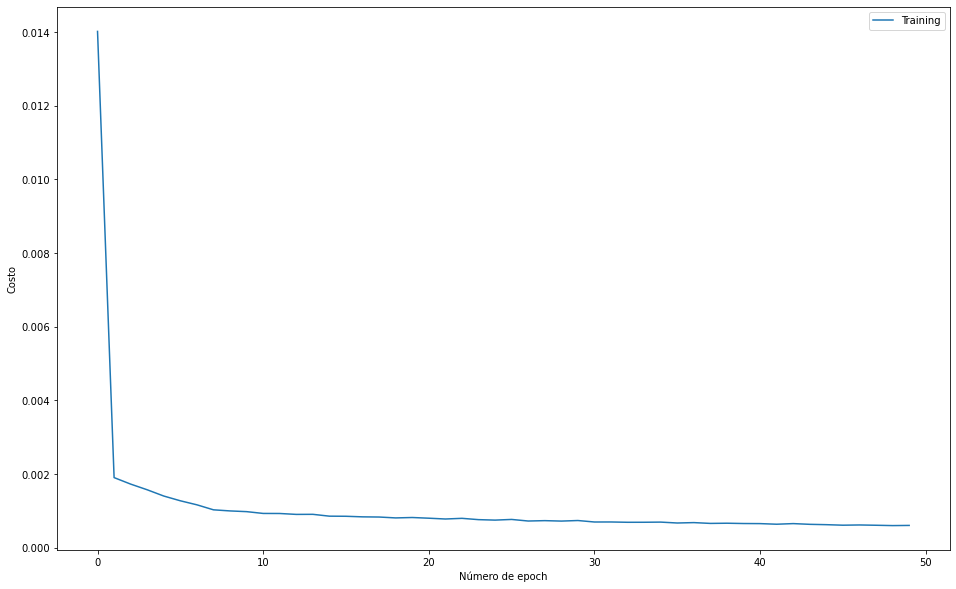

In [72]:
# Función de costo

plt.figure(figsize=(16,10))
plt.plot(history.history['loss'], label="Training")
plt.xlabel("Número de epoch")
plt.ylabel("Costo")
plt.legend();

In [73]:
# Predicciones

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inversión

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

# Evaluación del Método

Resultado = np.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Evaluación: %.2f RMSE' % (Resultado))

9/9 [==============================] - 0s 2ms/step
Evaluación: 0.01 RMSE


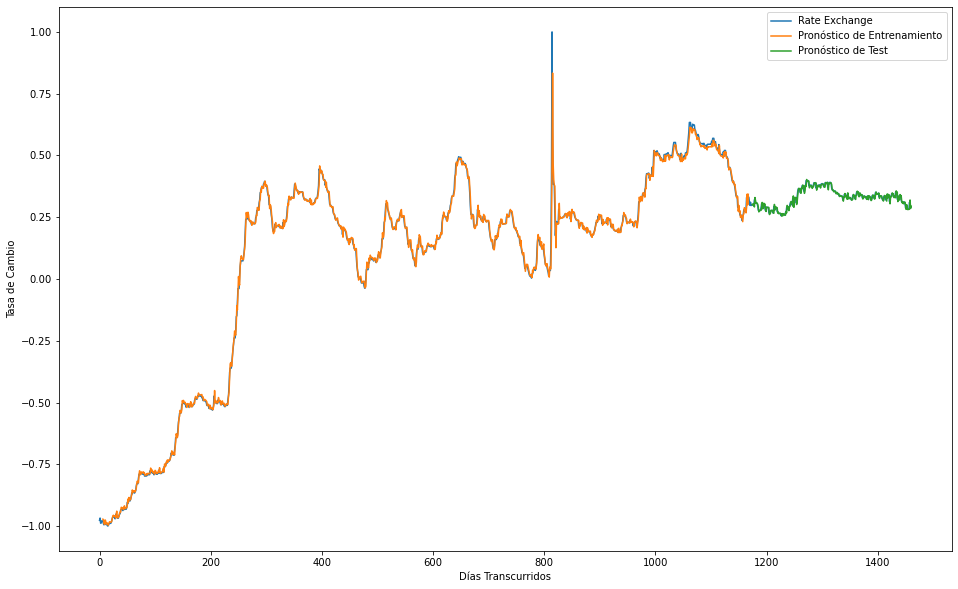

In [74]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[LOOK_BACK:len(trainPredict)+LOOK_BACK, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(LOOK_BACK*2) : len(dataset), :] = testPredict

plt.figure(figsize=(16,10))
plt.plot(scaler.inverse_transform(dataset), label="Rate Exchange")
plt.plot(trainPredictPlot, label="Pronóstico de Entrenamiento")
plt.plot(testPredictPlot, label="Pronóstico de Test")

plt.xlabel('Días Transcurridos')
plt.ylabel('Tasa de Cambio')
plt.legend();
plt.show();

## Análisis y Conclusiones

Utilizando los últimos seis valores de la base de datos se ha pronosticado el tipo de cambio de dólar estaunidense a quetzal. Los resultados obtenidos y que se pueden visualizar a través de las gráficas, cálculos e índices de error demuestran la efectividad del método de Red Neuronal Recurrente que se ha implementado.

Es importante considerar que las particularidades del dataset, y la linealidad y estabilidad de los datos han permitido obtener resultados que exceden el nivel de aceptabilidad en la estimación, por lo que se puede identificar la importancia de un pre-procesamiento de datos, pero también del factor externo de la naturaleza de los datos que se están evaluando.